In [8]:
from pathlib import Path
import yaml
import pandas as pd
import numpy as np
from rlsim.stores.dbr_stores import DBR_stores
import simpy
from scipy.stats import erlang

import matplotlib.pyplot as plt

In [2]:
resource_path = Path("../example/config/resources.yaml")
with open(resource_path, "r") as file:
    resources_cfg = yaml.safe_load(file)

products_path = Path("../example/config/products.yaml")
with open(products_path, "r") as file:
    products_cfg = yaml.safe_load(file)


In [3]:
env = simpy.Environment()
dbr = DBR_stores(env=env, resources=resources_cfg, products=products_cfg)


In [11]:
product = "produto01"
ccr_processing_time = sum([
                    process["processing_time"]["params"][0]
                    for process in dbr.processes_value_list[product]
                    if process["resource"] == "r02"
                ])
            

In [12]:
ccr_processing_time

0.726

In [4]:
df = pd.DataFrame(data=np.zeros((len(products_cfg), len(resources_cfg))),
                  index=products_cfg.keys(),
                  columns=resources_cfg.keys())
df


,r01,r02,r03,r04,r05,r06,r07,r08,r09,r10,r11,r12,r13
produto01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
produto02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
produto03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
produto04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
produto05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
produto06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
produto07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
produto08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
produto09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
produto10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


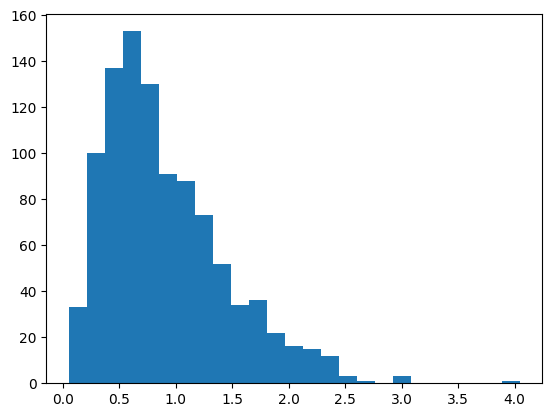

In [14]:
erlang_dist = erlang(3, scale=1/3.333)
erlang_dist.rvs(10)
values = erlang_dist.rvs(1000)
plt.hist(values, bins=25)
plt.show()


In [18]:
import random
def self.dist.random_number(distribution, params) -> float:
    value = 0
    if distribution == "constant":
        value = params[0]
    elif distribution == "uniform":
        c = params[1] * 2 * np.sqrt(3)
        a = params[0] - (c / 2)
        b = params[0] + (c / 2)
        print(a,b)
        value = random.uniform(a, b)
    elif distribution == "gamma":
        k = params[0] ** 2 / params[1] ** 2
        theta = params[1] ** 2 / params[0]
        print(k, theta)
        value = random.gammavariate(k, theta)
    elif distribution == "erlang":
        k = params[0] ** 2 / params[1] ** 2
        theta = params[1] ** 2 / params[0]
        print(k, theta)
        value = random.gammavariate(k, theta)
    elif distribution == "expo":
        value = random.expovariate(1 / params[0])
    elif distribution == "normal":
        value = random.normalvariate(params[0], params[1])
    else:
        value = 0
    


    return value

In [23]:
self.dist.random_number("erlang", [10, 5.00])

4.0 2.5


7.885204781713883

In [16]:
values.min()

np.float64(0.053171101781421065)

In [5]:
df  = dbr.define_constraint()
df

,r01,r02,r03,r04,r05,r06,r07,r08,r09,r10,r11,r12,r13
produto01,0.078,0.0726,0.0000,0.1057,0.0,0.00,0.0000,0.0000,0.1175,0.18,0.144,0.0000,0.000
produto02,0.078,0.0726,0.0000,0.0000,0.2,0.00,0.0000,0.1875,0.1175,0.18,0.144,0.0000,0.000
produto03,0.078,0.0726,0.0000,0.1057,0.0,0.14,0.0000,0.0000,0.1175,0.00,0.144,0.1157,0.000
produto04,0.078,0.0726,0.0000,0.1057,0.0,0.00,0.1775,0.0000,0.1175,0.18,0.144,0.0000,0.000
produto05,0.078,0.1089,0.0000,0.1057,0.0,0.00,0.0000,0.0000,0.1175,0.00,0.000,0.1157,0.145
produto06,0.078,0.0726,0.0000,0.0000,0.2,0.00,0.1775,0.0000,0.1175,0.00,0.000,0.1157,0.145
produto07,0.078,0.1089,0.0000,0.0000,0.0,0.00,0.1775,0.1875,0.0000,0.00,0.000,0.1157,0.145
produto08,0.078,0.1089,0.2667,0.1057,0.0,0.14,0.1775,0.1875,0.1175,0.00,0.000,0.1157,0.145
produto09,0.078,0.1089,0.2667,0.1057,0.2,0.28,0.0000,0.1875,0.0000,0.18,0.000,0.1157,0.145
produto10,0.078,0.1089,0.2667,0.1057,0.2,0.14,0.1775,0.0000,0.1175,0.00,0.144,0.1157,0.145


In [6]:
dbr.constraint_resource

'r09'

In [21]:
df.sum().sort_values(ascending=False).index[0]

'r09'

In [17]:
a = simpy.FilterStore(env)
a.put(2)
a.put(4)
a.put(5)
b = yield a.get()
b

SyntaxError: 'yield' outside function (2975993968.py, line 5)

In [4]:

a = 5

match a:
    case 1:
        print(a)
    case 2: 
        print(a)
    case TypeError:
        print("erro")


erro


In [16]:
from rlsim.engine.utils import Distribution

dst = Distribution(5)

print(dst.random_number("uniform", [10,5]))
print(dst.random_number("uniform", [10,5]))
print(dst.random_number("uniform", [10,5]))
print(dst.random_number("uniform", [10,5]))
print(dst.random_number("uniform", [10,5]))


12.128719
14.187874
15.112903
17.663464
14.155166
